In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
def load_iris():
    iris = datasets.load_iris()
    X = iris.data  # Use all four features
    y = iris.target.reshape(-1, 1)
    return X, y

In [3]:
X, y = load_iris()

In [4]:
# Preprocess data
scaler = StandardScaler()
X = scaler.fit_transform(X)
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y)

In [5]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Build ANN model with Batch Normalization
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(3, activation='softmax')
])

In [7]:
# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
# Train model
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100


12/12 [==============================] - 5s 63ms/step - loss: 2.0393 - accuracy: 0.3583 - val_loss: 1.5579 - val_accuracy: 0.3667
Epoch 2/100
12/12 [==============================] - 0s 9ms/step - loss: 1.5202 - accuracy: 0.5750 - val_loss: 1.4531 - val_accuracy: 0.7000
Epoch 3/100
12/12 [==============================] - 0s 9ms/step - loss: 1.0979 - accuracy: 0.7500 - val_loss: 1.3702 - val_accuracy: 0.7000
Epoch 4/100
12/12 [==============================] - 0s 8ms/step - loss: 1.0583 - accuracy: 0.7750 - val_loss: 1.3067 - val_accuracy: 0.7333
Epoch 5/100
12/12 [==============================] - 0s 9ms/step - loss: 0.8940 - accuracy: 0.8417 - val_loss: 1.2504 - val_accuracy: 0.7667
Epoch 6/100
12/12 [==============================] - 0s 9ms/step - loss: 0.9251 - accuracy: 0.8083 - val_loss: 1.1966 - val_accuracy: 0.7333
Epoch 7/100
12/12 [==============================] - 0s 9ms/step - loss: 0.8936 - accuracy: 0.8333 - val_loss: 1.1462 - val_accuracy: 0.7333
Epoch 8/10

In [9]:
# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 93.33%


In [10]:
# Predictions
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

1/1 [==============================] - 0s 241ms/step


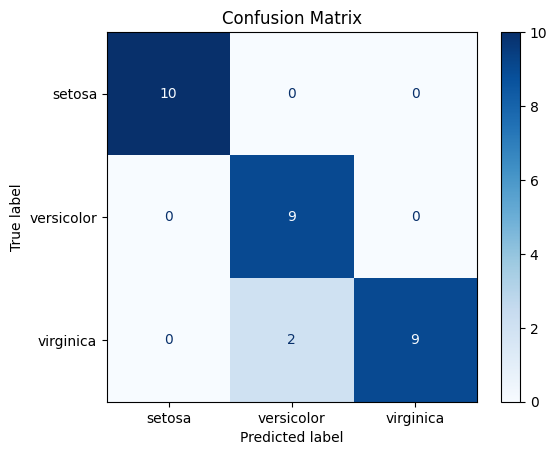

In [11]:
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=datasets.load_iris().target_names)
display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()